<a href="https://colab.research.google.com/github/cwcheng0/practicepython/blob/master/SKLearn_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# SKLearn Decision Tree
# SKLearn practice using Wine as an example
# source1 video http://www.peixun.net/main.php?mod=course&cid=1281
# 2019-2-3

%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r)
      )

Single Tree:0.8888888888888888 Random Forest:0.9814814814814815


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
# Load data
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [22]:
# Check target items
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

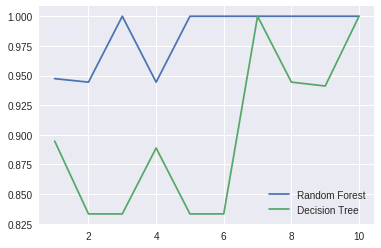

In [23]:
# 交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
# Cross Verify

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data, wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "Random Forest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")

plt.legend()
plt.show()

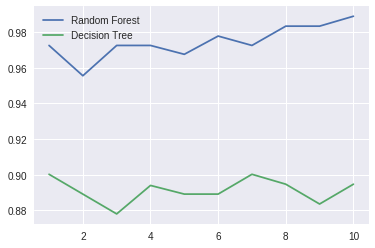

In [24]:
# 交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
# 10 times

rfc_l = []
clf_l = []

for i in range(10):
  rfc = RandomForestClassifier(n_estimators=25)
  rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
  rfc_l.append(rfc_s)
  clf = DecisionTreeClassifier()
  clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
  clf_l.append(clf_s)

plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

0.9888888888888889 34


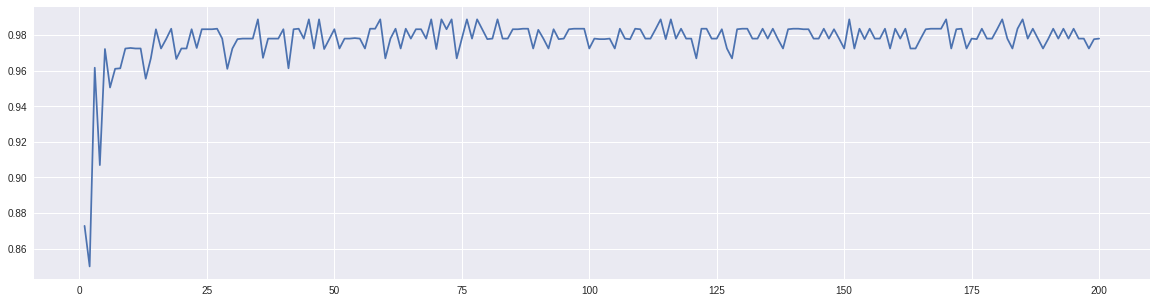

In [25]:
# N estimator
#####【TIME WARNING: 2mins 30 seconds】#####

superpa = []
for i in range(200):
  rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
  rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
  superpa.append(rfc_s)
  
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [26]:
# Others
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)
rfc.feature_importances_
rfc.apply(Xtest)
rfc.predict(Xtest)
rfc.predict_proba(Xtest)

array([[0.2 , 0.08, 0.72],
       [0.04, 0.96, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.08, 0.92],
       [0.08, 0.24, 0.68],
       [0.48, 0.52, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.2 , 0.8 , 0.  ],
       [0.08, 0.32, 0.6 ],
       [0.  , 0.04, 0.96],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.08, 0.88, 0.04],
       [0.  , 0.08, 0.92],
       [0.96, 0.04, 0.  ],
       [0.  , 0.24, 0.76],
       [0.96, 0.04, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.08, 0.88],
       [0.88, 0.12, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.92, 0.08, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.04, 0.92],
       [0.  , 0.32, 0.68],
       [0.04, 0.04, 0.92],
       [0.  , 0.12, 0.88],
       [0.04, 0.04, 0.92],
       [0.16, 0.8 , 0.04],
       [0.4 , 0.48, 0.12],
       [0.  , 0.92, 0.08],
       [0.08, 0.32, 0.6 ],
       [0.8 , 0.2 , 0.  ],
 